# 4DVarNet-OI Evaluation Notebook (OSSE)

## 1. Import tools and change directory

In [ ]:
from utils_OSSE import *
import pandas as pd
import os

In [ ]:
os.chdir("/gpfswork/rech/yrf/uba22to/4dvarnet-core")
print(os.getcwd())

## 2. Run the code 

In [3]:
!python hydra_main.py xp=oi_osse file_paths=dc_osse entrypoint=run entrypoint.max_epochs=30

/gpfsdswork/projects/rech/yrf/uba22to/4dvarnet-core/hydra_main.py:194: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='hydra_config', config_name='main')
/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/upgrades/1.1_to_1.2/changes_to_job_working_dir for more information.
  ret = run_job(
Global seed set to 0
file_paths:
  oi_path: /gpfsstore/rech/yrf/commun/NATL60/NATL/oi/ssh_NATL60_swot_4nadir.nc
  obs_mask_path: /gpfsstore/rech/yrf/commun/NATL60/NATL/data_new/dataset_nadir_0d_swot.nc
  gt_path: /gpfsstore/rech/yrf/commun/NATL60/NATL/ref/NATL60-CJM165_NATL_ssh_y2013.1y.nc
  sst_path: /gpfsstore/rech/yrf/commun/NATL60/NATL/ref/NATL60-CJM165_NATL_sst_y2013.1y.nc
entrypoint

Epoch 0:  89%|▉| 110/123 [00:43<00:05,  2.54it/s, loss=0.784, v_num=1743823, los
Validating: 0it [00:00, ?it/s]
Validating:   0%|                                        | 0/17 [00:00<?, ?it/s]
Epoch 0:  93%|▉| 115/123 [00:44<00:03,  2.60it/s, loss=0.784, v_num=1743823, los
Epoch 0:  98%|▉| 120/123 [00:45<00:01,  2.67it/s, loss=0.784, v_num=1743823, los
Validating:  88%|███████████████████████████▎   | 15/17 [00:02<00:00,  6.84it/s]
Epoch 0: 100%|█| 123/123 [00:46<00:00,  2.68it/s, loss=0.783, v_num=1743823, los
Epoch 1:  89%|▉| 110/123 [00:53<00:06,  2.09it/s, loss=0.643, v_num=1743823, los
Validating: 0it [00:00, ?it/s]
Validating:   0%|                                        | 0/17 [00:00<?, ?it/s]
Epoch 1:  93%|▉| 115/123 [00:54<00:03,  2.14it/s, loss=0.643, v_num=1743823, los
Epoch 1:  98%|▉| 120/123 [00:55<00:01,  2.19it/s, loss=0.643, v_num=1743823, los
Validating:  88%|███████████████████████████▎   | 15/17 [00:02<00:00,  5.33it/s]
Epoch 1: 100%|█| 123/123 [00:56<00:00,  2.20it/

/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:678: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
Testing: 100%|██████████████████████████████████| 14/14 [00:02<00:00,  6.50it/s]mse_pred =  0.0019120354
grad_mse_pred =  0.00038765405102148237
/gpfsdswork/projects/rech/yrf/uba22to/4dvarnet-core/spectral.py:55: RuntimeWarning: invalid value en

# 3. Retrieve and import the results

In [11]:
import glob
from datetime import datetime
import numpy as np

dirs = glob.glob("/gpfswork/rech/yrf/uba22to/4dvarnet-core/dashboard/oi_osse/lightning_logs/*")
file = max(dirs, key=os.path.getctime) + "/maps.nc"
print(file)

# import 4dvarNet reconstruction
data_4dvarnet = xr.open_dataset(file)
#time = [ np.datetime_as_string(date, unit='D') for date in data_4dvarnet.time.values ]
time = data_4dvarnet.Time.values

# import OI baseline
file = "/gpfsstore/rech/yrf/commun/NATL60/NATL/oi/ssh_NATL60_swot_4nadir.nc"
data_baseline = xr.open_dataset(file)
data_baseline = data_baseline.sel(time=slice(time[0],time[-1]),
                                  lat=slice(33,43),
                                  lon=slice(-65.0,-55))
# coarsen OI with factor 4
data_baseline = data_baseline.coarsen(lon=4).mean(skipna=True).coarsen(lat=4).mean(skipna=True)

# rename variables
data_baseline = data_baseline.update({
                     'gt':(('time','lat','lon'),data_4dvarnet.GT.values),
                     'obs_inp':(('time','lat','lon'),data_4dvarnet.OBS.values),
                     'pred':(('time','lat','lon'),data_baseline.ssh_obs.values)})
data_4dvarnet = data_4dvarnet.update({
                     'gt':(('time','lat','lon'),data_4dvarnet.GT.values),
                     'obs_inp':(('time','lat','lon'),data_4dvarnet.OBS.values),
                     'pred':(('time','lat','lon'),data_4dvarnet['4DVarNet'].values)})

/gpfswork/rech/yrf/uba22to/4dvarnet-core/dashboard/oi_osse/lightning_logs/version_1743824/maps.nc


## 2. Compute RMSE-based scores

In [12]:
rmse_t_pred_baseline, rmse_xy_pred_baseline, nrmse_pred_baseline, nrmse_std_pred_baseline = rmse_based_scores(data_baseline,'pred')
rmse_t_pred_4dvarnet, rmse_xy_pred_4dvarnet, nrmse_pred_4dvarnet, nrmse_std_pred_4dvarnet = rmse_based_scores(data_4dvarnet,'pred')

## 3. Compute spectral scores

[                                        ] | 0% Completed |  0.0s

/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


[########################################] | 100% Completed |  0.3s
[######################                  ] | 56% Completed |  0.1s

/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


[########################################] | 100% Completed |  0.2s
[###################                     ] | 48% Completed |  0.1s

/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


[########################################] | 100% Completed |  0.2s
[#####################                   ] | 54% Completed |  0.1s

/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


[########################################] | 100% Completed |  0.2s


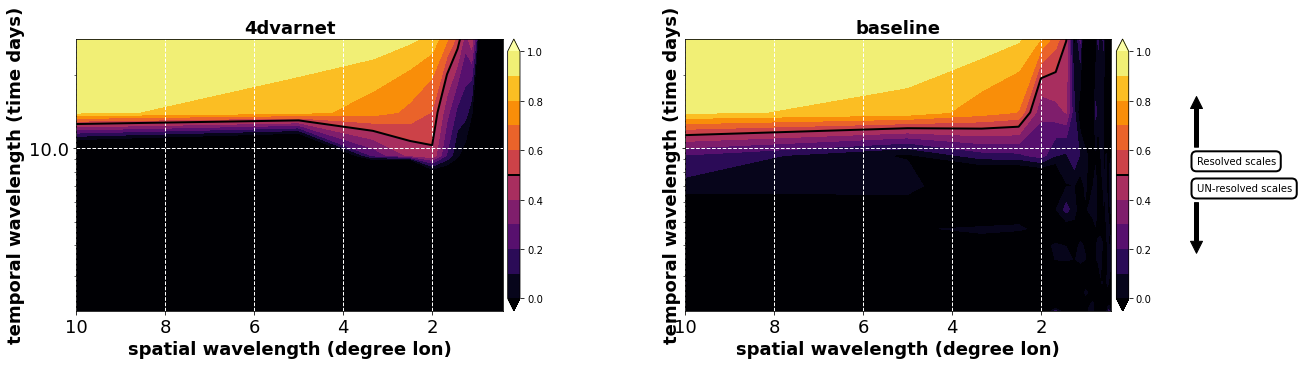

In [13]:
%matplotlib inline  

ds_psd_pred_baseline, lambda_x_pred_baseline, lambda_t_pred_baseline = psd_based_scores(data_baseline,'pred')
ds_psd_pred_4dvarnet, lambda_x_pred_4dvarnet, lambda_t_pred_4dvarnet = psd_based_scores(data_4dvarnet,'pred')

psd_concat = xr.concat((ds_psd_pred_4dvarnet, ds_psd_pred_baseline), dim='experiment')
psd_concat['experiment'] = ["4dvarnet","baseline"]
plot_psd_score(psd_concat)

## 4. Export RMSE and spectral scores

In [14]:
tab_score = pd.DataFrame(dict(name=['4dVarnet',"baseline"],
                  mu_RMSE=[nrmse_pred_4dvarnet,nrmse_pred_baseline],
                  std_RMSE=[nrmse_std_pred_4dvarnet,nrmse_std_pred_baseline],
                  lambda_x_degree=[lambda_x_pred_4dvarnet,lambda_x_pred_baseline],
                  lambda_t_days=[lambda_t_pred_4dvarnet,lambda_t_pred_baseline],
                  Notes = ['4dvarnet','baseline']))
tab_score

,name,mu_RMSE,std_RMSE,lambda_x_degree,lambda_t_days,Notes
0,4dVarnet,0.92,0.01,1.37,10.28,4dvarnet
1,baseline,0.91,0.02,1.43,11.30,baseline


## 5. Display nRMSE time series on the test period 

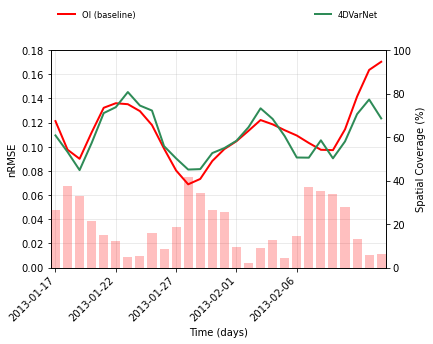

In [15]:
TS(list_data=[data_baseline.gt.values,data_baseline.obs_inp.values,
              data_baseline.pred.values, data_4dvarnet.pred.values],
   labels_data=np.array(['GT','Obs', 'OI (baseline)', '4DVarNet']),
   colors=np.array(['k','','red','seagreen']),
   symbols=np.array(['k','','o','o']),
   lstyle=np.array(['solid','','solid','solid']),lwidth = np.array([2,2,2,2]),
   lday=time,
   gradient=False)

## 6. Display raw and gradient fields

/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python

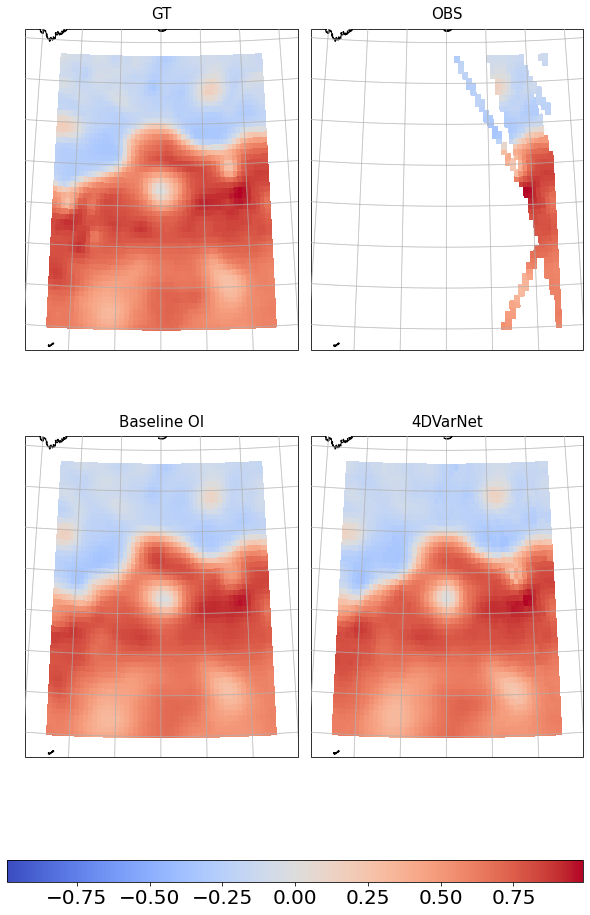

<Figure size 432x288 with 0 Axes>

In [16]:
itime = 20
plot_maps(data_baseline.gt[itime].values,data_baseline.obs_inp[itime].values,
          [data_baseline.pred[itime].values,data_4dvarnet.pred[itime].values],[],
          data_baseline.lon,data_baseline.lat,new_method='4DVarNet',grad=False, 
          orthographic=True,cartopy=True,figsize=(10,15))

/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/linkhome/rech/genimt01/uba22to/.conda/envs/4dvarnet/lib/python

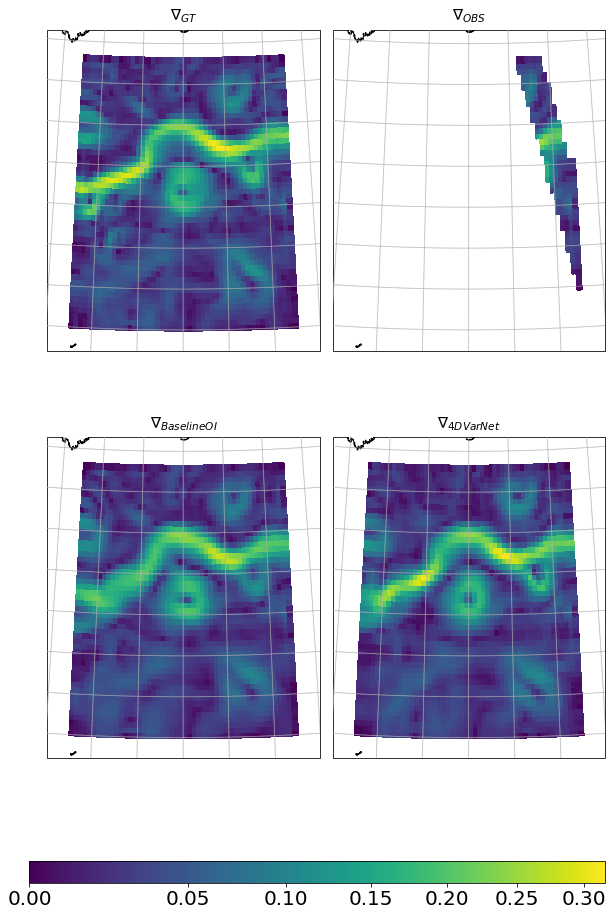

<Figure size 432x288 with 0 Axes>

In [18]:
plot_maps(data_baseline.gt[itime].values,data_baseline.obs_inp[itime].values,
          [data_baseline.pred[itime].values,data_4dvarnet.pred[itime].values],[],
          data_baseline.lon,data_baseline.lat,new_method='4DVarNet',grad=True, 
          orthographic=True,cartopy=True,figsize=(10,15))